# Setup dataset


In [ ]:
# Import delle librerie utili

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('AEP_hourly.csv')

print(df.head())
print(df.tail())

Saving AEP_hourly.csv to AEP_hourly (1).csv
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0
                   Datetime   AEP_MW
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0


In [ ]:
# Converti la colonna Datetime in DateTimeIndex e ordina la colonna
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')  # Garantiamo la conversione
df_sorted = df.sort_values(by='Datetime').reset_index(drop=True)

# Raggruppa per giorno e calcola la media del consumo, quindi rinomina le colonne
df_daily = df_sorted.groupby(df_sorted['Datetime'].dt.date)['AEP_MW'].mean().reset_index()
df_daily.columns = ['Datetime', 'AEP_MW']

# Converti 'Datetime' in formato datetime se necessario
df_daily['Datetime'] = pd.to_datetime(df_daily['Datetime'], errors='coerce')

# Filtra il DataFrame per gli anni da 2008 a 2017
df_subset_0817 = df_daily[(df_daily['Datetime'].dt.year >= 2008) & (df_daily['Datetime'].dt.year <= 2017)].copy()

# Crea una copia del dataset utile per il modello Prophet e imposta l'indice
df_prophet = df_subset_0817.copy()
df_subset_0817.set_index('Datetime', inplace=True)

# Verifica e converte l'indice in DatetimeIndex se necessario e imposta la frequenza giornaliera
if not isinstance(df_subset_0817.index, pd.DatetimeIndex):
    df_subset_0817.index = pd.to_datetime(df_subset_0817.index)
df_subset_0817 = df_subset_0817.asfreq('D')

# Assegniamo alla variabile y il riferimento alla colonna AEP_MW
y = df_subset_0817['AEP_MW']

# Mostra i risultati
print(df_sorted.head())
print(df_sorted.tail())
print(df_daily)
print(df_subset_0817)
print(f"Frequenza dell'indice: {df_subset_0817.index.freq}")


             Datetime   AEP_MW
0 2004-10-01 01:00:00  12379.0
1 2004-10-01 02:00:00  11935.0
2 2004-10-01 03:00:00  11692.0
3 2004-10-01 04:00:00  11597.0
4 2004-10-01 05:00:00  11681.0
                  Datetime   AEP_MW
121268 2018-08-02 20:00:00  17673.0
121269 2018-08-02 21:00:00  17303.0
121270 2018-08-02 22:00:00  17001.0
121271 2018-08-02 23:00:00  15964.0
121272 2018-08-03 00:00:00  14809.0
       Datetime        AEP_MW
0    2004-10-01  14284.521739
1    2004-10-02  12999.875000
2    2004-10-03  12227.083333
3    2004-10-04  14309.041667
4    2004-10-05  14439.708333
...         ...           ...
5050 2018-07-30  15368.083333
5051 2018-07-31  15180.291667
5052 2018-08-01  15151.166667
5053 2018-08-02  15687.666667
5054 2018-08-03  14809.000000

[5055 rows x 2 columns]
                  AEP_MW
Datetime                
2008-01-01  16597.458333
2008-01-02  20783.166667
2008-01-03  21083.625000
2008-01-04  20215.375000
2008-01-05  17594.083333
...                  ...
2017-12-27  1

In [ ]:
pip install prophet --no-binary :all:

In [ ]:
!pip install prophet

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



HW - Fold 1: RMSE=1634.40, MAE=1284.16, MAPE=8.41, MASE=0.0777
------------------------------
ARIMA - Fold 1: RMSE=2448.06, MAE=2105.18, MAPE=14.42, MASE=0.1273
------------------------------
SARIMA - Fold 1: RMSE=2533.13, MAE=2150.33, MAPE=14.88, MASE=0.1300
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/pf2tx0kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/epku7bp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64929', 'data', 'file=/tmp/tmpillt0b2c/pf2tx0kc.json', 'init=/tmp/tmpillt0b2c/epku7bp7.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelu7rq8f2f/prophet_model-20250309174231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 1: RMSE=1578.45, MAE=1236.64, MAPE=7.79, MASE=0.0748
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/t3yp_1df.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/5lvecezm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20389', 'data', 'file=/tmp/tmpillt0b2c/t3yp_1df.json', 'init=/tmp/tmpillt0b2c/5lvecezm.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_model86k3i0fw/prophet_model-20250309174413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


HW - Fold 2: RMSE=1765.22, MAE=1433.05, MAPE=9.13, MASE=0.0902
------------------------------
ARIMA - Fold 2: RMSE=2017.58, MAE=1722.44, MAPE=10.92, MASE=0.1084
------------------------------
SARIMA - Fold 2: RMSE=2111.71, MAE=1746.56, MAPE=10.66, MASE=0.1099
------------------------------


17:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 2: RMSE=1856.95, MAE=1508.94, MAPE=8.98, MASE=0.0949
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/tmk589bp.json


HW - Fold 3: RMSE=1172.99, MAE=945.88, MAPE=5.96, MASE=0.0594
------------------------------
ARIMA - Fold 3: RMSE=1766.33, MAE=1477.12, MAPE=9.65, MASE=0.0927
------------------------------
SARIMA - Fold 3: RMSE=1712.33, MAE=1413.15, MAPE=8.96, MASE=0.0887
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/ooz3dkfj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89921', 'data', 'file=/tmp/tmpillt0b2c/tmk589bp.json', 'init=/tmp/tmpillt0b2c/ooz3dkfj.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelvkec948b/prophet_model-20250309174616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:46:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:46:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 3: RMSE=1308.67, MAE=1049.07, MAPE=6.74, MASE=0.0658
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/kxgy9kox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/4hn4rc5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84766', 'data', 'file=/tmp/tmpillt0b2c/kxgy9kox.json', 'init=/tmp/tmpillt0b2c/4hn4rc5j.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelrmf9fe8s/prophet_model-20250309174914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


HW - Fold 4: RMSE=1330.45, MAE=1060.49, MAPE=6.88, MASE=0.0667
------------------------------
ARIMA - Fold 4: RMSE=1734.68, MAE=1435.50, MAPE=9.63, MASE=0.0903
------------------------------
SARIMA - Fold 4: RMSE=1699.59, MAE=1396.02, MAPE=9.33, MASE=0.0878
------------------------------


17:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 4: RMSE=1273.02, MAE=1031.12, MAPE=6.58, MASE=0.0648
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/e3jdzlee.json


HW - Fold 5: RMSE=1948.41, MAE=1592.77, MAPE=10.84, MASE=0.1009
------------------------------
ARIMA - Fold 5: RMSE=1851.73, MAE=1547.73, MAPE=10.69, MASE=0.0980
------------------------------
SARIMA - Fold 5: RMSE=1777.64, MAE=1484.30, MAPE=10.06, MASE=0.0940
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/plizzayb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27126', 'data', 'file=/tmp/tmpillt0b2c/e3jdzlee.json', 'init=/tmp/tmpillt0b2c/plizzayb.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelr5s8ufvk/prophet_model-20250309175234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 5: RMSE=1215.06, MAE=942.14, MAPE=6.14, MASE=0.0597
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/1odk_7np.json


HW - Fold 6: RMSE=1961.96, MAE=1515.43, MAPE=9.45, MASE=0.0966
------------------------------
ARIMA - Fold 6: RMSE=2122.27, MAE=1739.08, MAPE=11.75, MASE=0.1108
------------------------------
SARIMA - Fold 6: RMSE=2034.80, MAE=1637.14, MAPE=10.87, MASE=0.1043
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/pq4t79nv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52978', 'data', 'file=/tmp/tmpillt0b2c/1odk_7np.json', 'init=/tmp/tmpillt0b2c/pq4t79nv.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelka7jrtjc/prophet_model-20250309175608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 6: RMSE=1350.06, MAE=976.32, MAPE=6.17, MASE=0.0622
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/8usxr90_.json


HW - Fold 7: RMSE=1887.13, MAE=1448.23, MAPE=9.21, MASE=0.0927
------------------------------
ARIMA - Fold 7: RMSE=2201.77, MAE=1824.60, MAPE=12.64, MASE=0.1168
------------------------------
SARIMA - Fold 7: RMSE=2045.32, MAE=1655.21, MAPE=11.29, MASE=0.1060
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/bvwdtxmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39056', 'data', 'file=/tmp/tmpillt0b2c/8usxr90_.json', 'init=/tmp/tmpillt0b2c/bvwdtxmq.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelyqre4ug_/prophet_model-20250309180023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:00:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 7: RMSE=1369.53, MAE=991.89, MAPE=6.58, MASE=0.0635
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/f1tnhset.json


HW - Fold 8: RMSE=3213.27, MAE=2890.53, MAPE=18.93, MASE=0.1862
------------------------------
ARIMA - Fold 8: RMSE=2134.08, MAE=1757.74, MAPE=12.04, MASE=0.1132
------------------------------
SARIMA - Fold 8: RMSE=2015.22, MAE=1703.07, MAPE=11.75, MASE=0.1097
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/g6ir_9nz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52419', 'data', 'file=/tmp/tmpillt0b2c/f1tnhset.json', 'init=/tmp/tmpillt0b2c/g6ir_9nz.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_model8jtmy7xs/prophet_model-20250309180522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 8: RMSE=1344.52, MAE=1033.69, MAPE=6.75, MASE=0.0666
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/a33uvj2k.json


HW - Fold 9: RMSE=2044.63, MAE=1691.18, MAPE=11.28, MASE=0.1095
------------------------------
ARIMA - Fold 9: RMSE=1744.67, MAE=1440.79, MAPE=10.33, MASE=0.0933
------------------------------
SARIMA - Fold 9: RMSE=1646.16, MAE=1363.29, MAPE=9.70, MASE=0.0883
------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/iuynoufl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51745', 'data', 'file=/tmp/tmpillt0b2c/a33uvj2k.json', 'init=/tmp/tmpillt0b2c/iuynoufl.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_models_2fbzml/prophet_model-20250309181058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet - Fold 9: RMSE=1340.16, MAE=1020.86, MAPE=6.98, MASE=0.0661
------------------------------


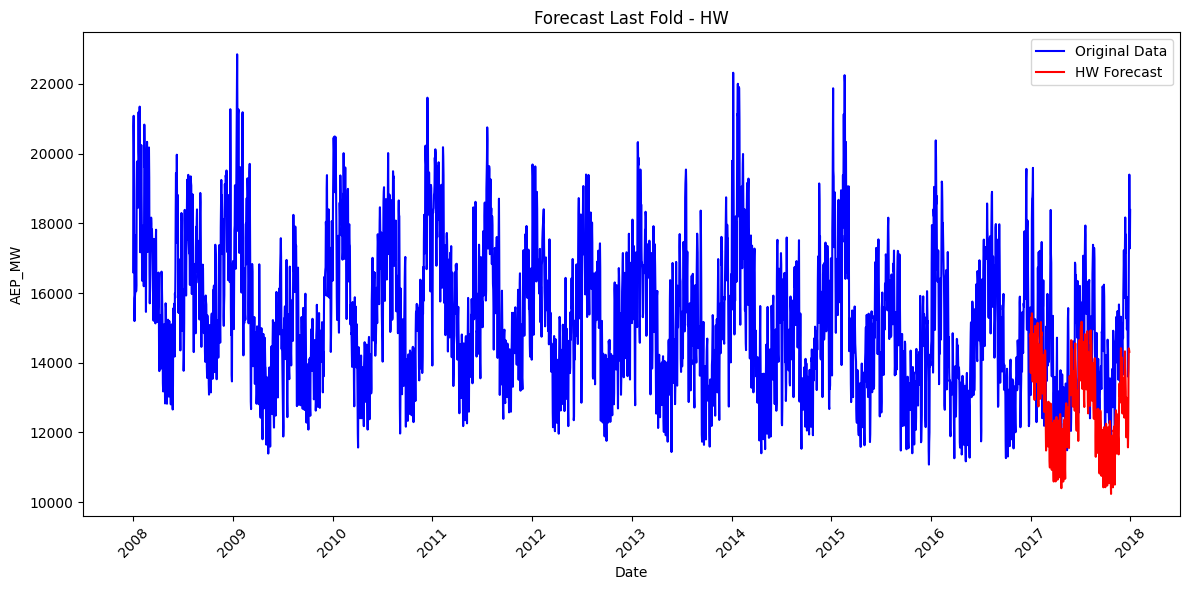

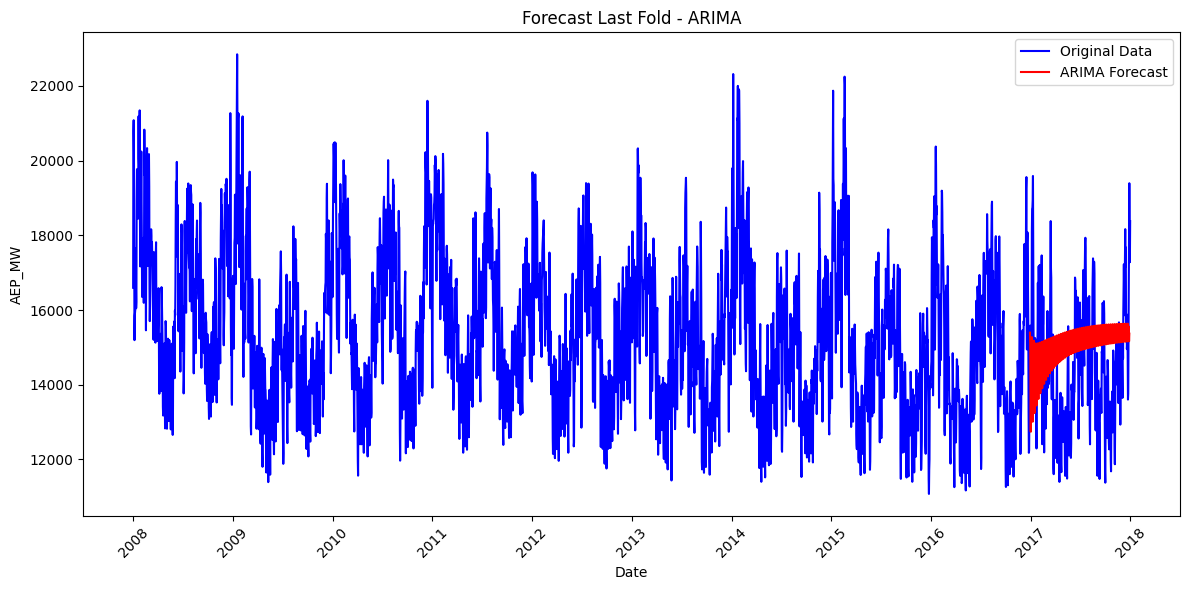

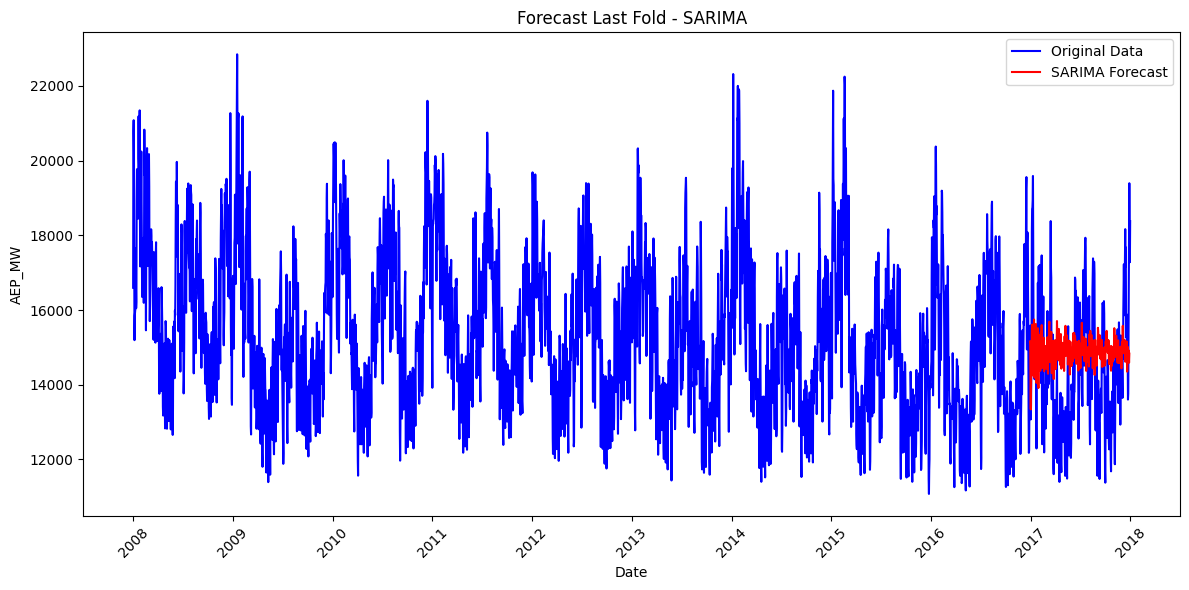

DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/vnzfvrw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpillt0b2c/72s903ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58970', 'data', 'file=/tmp/tmpillt0b2c/vnzfvrw8.json', 'init=/tmp/tmpillt0b2c/72s903ds.json', 'output', 'file=/tmp/tmpillt0b2c/prophet_modelp1p18hr1/prophet_model-20250309181102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


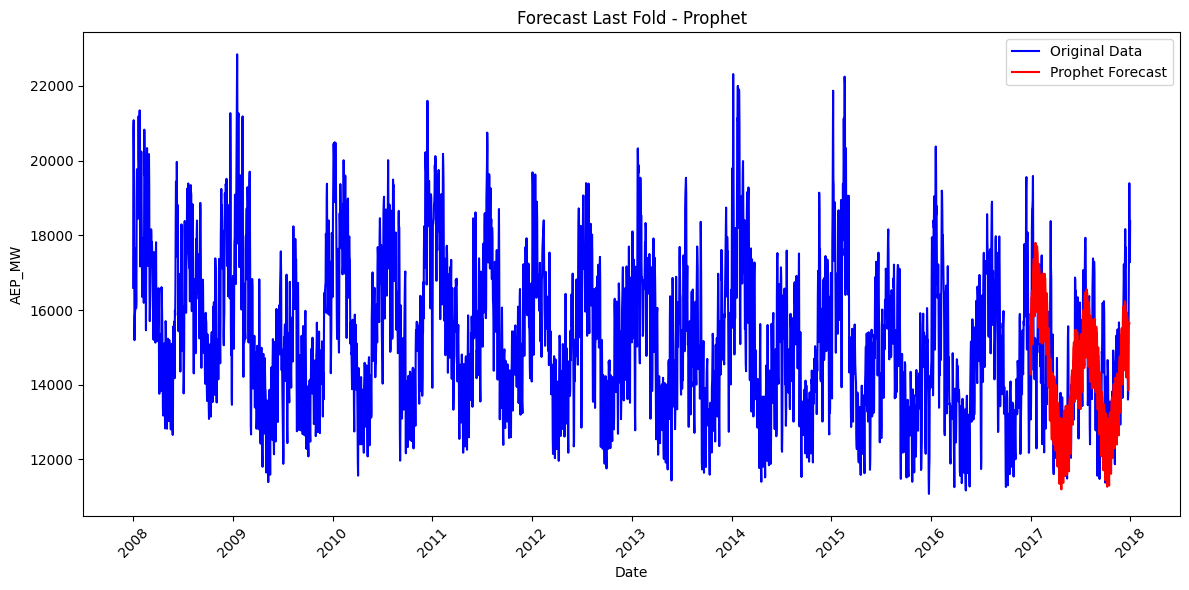

 
HW - Media: RMSE=1884.27, MAE=1540.19, MAPE=10.01, MASE=0.0977
HW - Mediana: RMSE=1887.13, MAE=1448.23, MAPE=9.21, MASE=0.0927

 
 
ARIMA - Media: RMSE=2002.35, MAE=1672.24, MAPE=11.34, MASE=0.1056
ARIMA - Mediana: RMSE=2017.58, MAE=1722.44, MAPE=10.92, MASE=0.1084

 
 
SARIMA - Media: RMSE=1952.88, MAE=1616.56, MAPE=10.83, MASE=0.1021
SARIMA - Mediana: RMSE=2015.22, MAE=1637.14, MAPE=10.66, MASE=0.1043

 
 
Prophet - Media: RMSE=1404.05, MAE=1087.85, MAPE=6.97, MASE=0.0687
Prophet - Mediana: RMSE=1344.52, MAE=1031.12, MAPE=6.74, MASE=0.0658

 


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

warnings.simplefilter('ignore', ConvergenceWarning)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Impostazioni per la cross-validation
n_test_years = 365
n_splits = len(y) // n_test_years

# Liste per raccogliere le metriche
metrics = {'HW': [], 'ARIMA': [], 'SARIMA': [], 'Prophet': []}

for i in range(n_splits - 1):
    train_end = (i + 1) * n_test_years
    train, test = y[:train_end], y[train_end:train_end + n_test_years]
    train_prophet, test_prophet = df_prophet.iloc[:train_end], df_prophet.iloc[train_end:train_end + n_test_years]

    models = {
        'HW': ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=182).fit(optimized=True),
        'ARIMA': ARIMA(train, order=(5, 0, 4)).fit(),
        'SARIMA': SARIMAX(train, order=(5, 0, 4), seasonal_order=(1, 1, 1, 30)).fit()
    }

    for model_name, model in models.items():
        forecast = model.forecast(len(test))
        rmse = root_mean_squared_error(test, forecast)
        mae = mean_absolute_error(test, forecast)
        mape = (abs(test - forecast) / test).mean() * 100
        mase = mae / train.mean()
        metrics[model_name].append((rmse, mae, mape, mase))
        print(f"{model_name} - Fold {i+1}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}, MASE={mase:.4f}")
        print("-" * 30)

    # Prophet - Nuovo modello a ogni iterazione
    prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    prophet_model.fit(train_prophet)

    future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
    forecast_prophet = prophet_model.predict(future)['yhat'].iloc[-len(test):].values

    rmse = root_mean_squared_error(test_prophet['y'].values, forecast_prophet)
    mae = mean_absolute_error(test_prophet['y'].values, forecast_prophet)
    mape = (abs(test_prophet['y'].values - forecast_prophet) / test_prophet['y'].values).mean() * 100
    mase = mae / train_prophet['y'].mean()
    metrics['Prophet'].append((rmse, mae, mape, mase))
    print(f"Prophet - Fold {i+1}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}, MASE={mase:.4f}")
    print("-" * 30)

# Grafico separato per ogni modello
for model_name, model in models.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y.index, y, label='Original Data', color='blue')
    plt.plot(test.index, model.forecast(len(test)), label=f'{model_name} Forecast', color='red')
    plt.xlabel('Date'); plt.ylabel('AEP_MW')
    plt.title(f'Forecast Last Fold - {model_name}')
    plt.legend(); plt.xticks(rotation=45); plt.tight_layout()
    plt.show()

# Prophet forecast plot separato (nuova istanza)
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(df_prophet.iloc[:train_end])
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
pred_prophet = prophet_model.predict(future)['yhat'].iloc[-len(test):].values

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Original Data', color='blue')
plt.plot(test.index, pred_prophet, label='Prophet Forecast', color='red')
plt.xlabel('Date'); plt.ylabel('AEP_MW')
plt.title('Forecast Last Fold - Prophet')
plt.legend(); plt.xticks(rotation=45); plt.tight_layout()
plt.show()

# Stampa medie e mediane delle metriche
for model_name, values in metrics.items():
    values = np.array(values)
    print(" ")
    print(f"{model_name} - Media: RMSE={values[:,0].mean():.2f}, MAE={values[:,1].mean():.2f}, MAPE={values[:,2].mean():.2f}, MASE={values[:,3].mean():.4f}")
    print(f"{model_name} - Mediana: RMSE={np.median(values[:,0]):.2f}, MAE={np.median(values[:,1]):.2f}, MAPE={np.median(values[:,2]):.2f}, MASE={np.median(values[:,3]):.4f}\n")
    print(" ")

# Estrarre le mediane delle metriche per ciascun modello
med_rmse_hw = np.median(np.array(metrics['HW'])[:, 0])
med_mae_hw = np.median(np.array(metrics['HW'])[:, 1])
med_mape_hw = np.median(np.array(metrics['HW'])[:, 2])
med_mase_hw = np.median(np.array(metrics['HW'])[:, 3])

med_rmse_arima = np.median(np.array(metrics['ARIMA'])[:, 0])
med_mae_arima = np.median(np.array(metrics['ARIMA'])[:, 1])
med_mape_arima = np.median(np.array(metrics['ARIMA'])[:, 2])
med_mase_arima = np.median(np.array(metrics['ARIMA'])[:, 3])

med_rmse_sarima = np.median(np.array(metrics['SARIMA'])[:, 0])
med_mae_sarima = np.median(np.array(metrics['SARIMA'])[:, 1])
med_mape_sarima = np.median(np.array(metrics['SARIMA'])[:, 2])
med_mase_sarima = np.median(np.array(metrics['SARIMA'])[:, 3])

med_rmse_prophet = np.median(np.array(metrics['Prophet'])[:, 0])
med_mae_prophet = np.median(np.array(metrics['Prophet'])[:, 1])
med_mape_prophet = np.median(np.array(metrics['Prophet'])[:, 2])
med_mase_prophet = np.median(np.array(metrics['Prophet'])[:, 3])


In [ ]:
# Funzione di normalizzazione Min-Max
def min_max_normalization(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value) if max_value != min_value else 0

# Dizionario per raccogliere le metriche normalizzate
normalized_metrics = {}

for model_name in metrics.keys():
    values = np.array(metrics[model_name])

    min_rmse, max_rmse = values[:, 0].min(), values[:, 0].max()
    min_mae, max_mae = values[:, 1].min(), values[:, 1].max()
    min_mape, max_mape = values[:, 2].min(), values[:, 2].max()
    min_mase, max_mase = values[:, 3].min(), values[:, 3].max()

    normalized_rmse = [min_max_normalization(rmse, min_rmse, max_rmse) for rmse in values[:, 0]]
    normalized_mae = [min_max_normalization(mae, min_mae, max_mae) for mae in values[:, 1]]
    normalized_mape = [min_max_normalization(mape, min_mape, max_mape) for mape in values[:, 2]]
    normalized_mase = [min_max_normalization(mase, min_mase, max_mase) for mase in values[:, 3]]

    avg_normalized_rmse = np.mean(normalized_rmse)
    avg_normalized_mae = np.mean(normalized_mae)
    avg_normalized_mape = np.mean(normalized_mape)
    avg_normalized_mase = np.mean(normalized_mase)

    # Salva nel dizionario
    normalized_metrics[model_name] = {
        'RMSE': avg_normalized_rmse,
        'MAE': avg_normalized_mae,
        'MAPE': avg_normalized_mape,
        'MASE': avg_normalized_mase
    }

    print(f"Media delle metriche normalizzate di tutti i fold ({model_name}):")
    print(f"RMSE (normalizzato): {avg_normalized_rmse}")
    print(f"MAE (normalizzato): {avg_normalized_mae}")
    print(f"MAPE (normalizzato): {avg_normalized_mape}")
    print(f"MASE (normalizzato): {avg_normalized_mase}")
    print("-" * 60)
    print(" ")

# Estrai i valori dal dizionario e assegna alle variabili necessarie
avg_normalized_rmse_hw = normalized_metrics['HW']['RMSE']
avg_normalized_mae_hw = normalized_metrics['HW']['MAE']
avg_normalized_mape_hw = normalized_metrics['HW']['MAPE']
avg_normalized_mase_hw = normalized_metrics['HW']['MASE']

avg_normalized_rmse_arima = normalized_metrics['ARIMA']['RMSE']
avg_normalized_mae_arima = normalized_metrics['ARIMA']['MAE']
avg_normalized_mape_arima = normalized_metrics['ARIMA']['MAPE']
avg_normalized_mase_arima = normalized_metrics['ARIMA']['MASE']

avg_normalized_rmse_sarima = normalized_metrics['SARIMA']['RMSE']
avg_normalized_mae_sarima = normalized_metrics['SARIMA']['MAE']
avg_normalized_mape_sarima = normalized_metrics['SARIMA']['MAPE']
avg_normalized_mase_sarima = normalized_metrics['SARIMA']['MASE']

avg_normalized_rmse_prophet = normalized_metrics['Prophet']['RMSE']
avg_normalized_mae_prophet = normalized_metrics['Prophet']['MAE']
avg_normalized_mape_prophet = normalized_metrics['Prophet']['MAPE']
avg_normalized_mase_prophet = normalized_metrics['Prophet']['MASE']


Media delle metriche normalizzate di tutti i fold (HW):
RMSE (normalizzato): 0.34862003247583767
MAE (normalizzato): 0.3056139372853759
MAPE (normalizzato): 0.3123550547919474
MASE (normalizzato): 0.3026730529391386
------------------------------------------------------------
 
Media delle metriche normalizzate di tutti i fold (ARIMA):
RMSE (normalizzato): 0.37521628725831313
MAE (normalizzato): 0.3535155264678066
MAPE (normalizzato): 0.3574295437064856
MASE (normalizzato): 0.4152197143229283
------------------------------------------------------------
 
Media delle metriche normalizzate di tutti i fold (SARIMA):
RMSE (normalizzato): 0.3458041894660491
MAE (normalizzato): 0.3218058823225733
MAPE (normalizzato): 0.3160960500184155
MASE (normalizzato): 0.33823359555203997
------------------------------------------------------------
 
Media delle metriche normalizzate di tutti i fold (Prophet):
RMSE (normalizzato): 0.29442679170862135
MAE (normalizzato): 0.25708170406737374
MAPE (normaliz

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL


# Eseguire la decomposizione STL
stl = STL(df_subset_0817, seasonal=181)  # Seasonal_period può essere cambiato in base alla stagionalità rilevata
result = stl.fit()

# Ottenere le componenti
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Calcolare le varianze
var_residual = np.var(residual)
var_trend_plus_residual = np.var(trend + residual)
var_seasonal_plus_residual = np.var(seasonal + residual)

# Calcolare la forza del trend
strength_trend = max(0, 1 - (var_residual / var_trend_plus_residual))

# Calcolare la forza della stagionalità
strength_seasonal = max(0, 1 - (var_residual / var_seasonal_plus_residual))

# Stampa dei risultati
print(f"Forza del Trend: {strength_trend}")
print(f"Forza della Stagionalità: {strength_seasonal}")


Forza del Trend: 0.8961291691068228
Forza della Stagionalità: 0.5758836601965687


In [ ]:
# Pesi componente w
w_RMSE = 0.25
w_MAE = 0.3
w_MAPE = 0.2
w_MASE = 0.25

# Pesi metriche in base al modello
# Holt Winters
z_RMSE_hw = 1 / med_rmse_hw
z_MAE_hw = 1 / med_mae_hw
z_MAPE_hw = 1 / med_mape_hw
z_MASE_hw = 1 / med_mase_hw
z_sum_hw = z_RMSE_hw + z_MAE_hw + z_MAPE_hw + z_MASE_hw

# Prophet
z_RMSE_prophet = 1 / med_rmse_prophet
z_MAE_prophet = 1 / med_mae_prophet
z_MAPE_prophet = 1 / med_mape_prophet
z_MASE_prophet = 1 / med_mase_prophet
z_sum_prophet = z_RMSE_prophet + z_MAE_prophet + z_MAPE_prophet + z_MASE_prophet

# ARIMA
z_RMSE_arima = 1 / med_rmse_arima
z_MAE_arima = 1 / med_mae_arima
z_MAPE_arima = 1 / med_mape_arima
z_MASE_arima = 1 / med_mase_arima
z_sum_arima = z_RMSE_arima + z_MAE_arima + z_MAPE_arima + z_MASE_arima

# SARIMA
z_RMSE_sarima = 1 / med_rmse_sarima
z_MAE_sarima = 1 / med_mae_sarima
z_MAPE_sarima = 1 / med_mape_sarima
z_MASE_sarima = 1 / med_mase_sarima
z_sum_sarima = z_RMSE_sarima + z_MAE_sarima + z_MAPE_sarima + z_MASE_sarima

# Stampa Holt Winters
print("HOLT WINTERS")

RMSE_weight_hw = ((strength_seasonal) * z_RMSE_hw) * w_RMSE
MAE_weight_hw = ((strength_seasonal) * z_MAE_hw) * w_MAE
MAPE_weight_hw = ((strength_seasonal) * z_MAPE_hw) * w_MAPE
MASE_weight_hw = ((strength_seasonal) * z_MASE_hw) * w_MASE

print(" ")
cfem_hw = (RMSE_weight_hw * avg_normalized_rmse_hw + MAE_weight_hw * avg_normalized_mae_hw +
           MAPE_weight_hw * avg_normalized_mape_hw + MASE_weight_hw * avg_normalized_mase_hw)
print(f"CFEM per modello Holt-Winters: {cfem_hw / z_sum_hw}")

print("\n\n")

# Stampa Prophet
print("PROPHET")

RMSE_weight_prophet = ((strength_seasonal) * z_RMSE_prophet) * w_RMSE
MAE_weight_prophet = ((strength_seasonal) * z_MAE_prophet) * w_MAE
MAPE_weight_prophet = ((strength_seasonal) * z_MAPE_prophet) * w_MAPE
MASE_weight_prophet = ((strength_seasonal) * z_MASE_prophet) * w_MASE

print(f"CFEM per modello Prophet: {(RMSE_weight_prophet * avg_normalized_rmse_prophet + MAE_weight_prophet * avg_normalized_mae_prophet + MAPE_weight_prophet * avg_normalized_mape_prophet + MASE_weight_prophet * avg_normalized_mase_prophet) / z_sum_prophet}")

print("\n\n")

# Stampa ARIMA
print("ARIMA")

RMSE_weight_arima = ((strength_seasonal) * z_RMSE_arima) * w_RMSE
MAE_weight_arima = ((strength_seasonal) * z_MAE_arima) * w_MAE
MAPE_weight_arima = ((strength_seasonal) * z_MAPE_arima) * w_MAPE
MASE_weight_arima = ((strength_seasonal) * z_MASE_arima) * w_MASE

print(f"CFEM per modello ARIMA: {(RMSE_weight_arima * avg_normalized_rmse_arima + MAE_weight_arima * avg_normalized_mae_arima +MAPE_weight_arima * avg_normalized_mape_arima + MASE_weight_arima * avg_normalized_mase_arima) / z_sum_arima}")

print("\n\n")

# Stampa SARIMA
print("SARIMA")

RMSE_weight_sarima =  ((strength_seasonal) * z_RMSE_sarima) * w_RMSE
MAE_weight_sarima =  ((strength_seasonal) * z_MAE_sarima) * w_MAE
MAPE_weight_sarima = ((strength_seasonal) * z_MAPE_sarima) * w_MAPE
MASE_weight_sarima =  ((strength_seasonal) * z_MASE_sarima) * w_MASE

print(f"CFEM per modello SARIMA: {(RMSE_weight_sarima * avg_normalized_rmse_sarima + MAE_weight_sarima * avg_normalized_mae_sarima + MAPE_weight_sarima * avg_normalized_mape_sarima + MASE_weight_sarima * avg_normalized_mase_sarima) / z_sum_sarima}")


HOLT WINTERS
 
CFEM per modello Holt-Winters: 0.04350128958786128



PROPHET
CFEM per modello Prophet: 0.03694341105496813



ARIMA
CFEM per modello ARIMA: 0.059596407285608846



SARIMA
CFEM per modello SARIMA: 0.04857724564731961
